## Transfer learning con CNN

In [1]:
import cv2
import numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split

def cargar_dataset_imagenes_raw(root_path, image_size=(64, 64)):
    """
    Lee las imágenes y las devuelve en formato (N, Alto, Ancho)
    con valores 0-255 (Enteros). Ideal para LBP.
    """
    X_list = []
    y_list = []
    
    root = Path(root_path)
    print(f"📂 Escaneando imágenes en: {root.absolute()} ...")
    
    if not root.exists():
        print("❌ Error: La ruta no existe.")
        return np.array([]), np.array([])

    contador = 0
    
    for img_path in root.rglob('*.*'):
        if img_path.suffix.lower() not in ['.png', '.jpg', '.jpeg', '.bmp']:
            continue
            
        # --- 1. ETIQUETADO ---
        label = 1 if 'anomaly' in str(img_path).lower() else 0
            
        # --- 2. LECTURA (Escala de Grises) ---
        img = cv2.imread(str(img_path), cv2.IMREAD_GRAYSCALE)
        
        if img is None: continue
        
        # --- 3. RESIZE (Obligatorio) ---
        img = cv2.resize(img, image_size)
        
        # --- 4. SIN NORMALIZACIÓN (CAMBIO AQUÍ) ---
        # Antes: img_norm = img.astype('float32') / 255.0
        # Ahora: Nos quedamos con la imagen tal cual (0-255)
        
        X_list.append(img)
        y_list.append(label)
        contador += 1

    # Convertimos la lista a un Array Numpy
    # Al no normalizar, se creará como uint8 (enteros), que ocupa 4 veces menos memoria RAM
    X_array = np.array(X_list)
    y_array = np.array(y_list)

    print(f"✅ Carga completa. {contador} imágenes procesadas.")
    return X_array, y_array

# --- EJECUCIÓN ---

ruta = "./ITD"
X_total, y_total = cargar_dataset_imagenes_raw(ruta, image_size=(64, 64))

# Verificación
print(f"\nForma de X_total: {X_total.shape}")
print(f"Tipo de dato: {X_total.dtype}") # Debería decir 'uint8'
print(f"Max valor pixel: {X_total.max()}") # Debería ser 255

# --- PARTICIÓN ---
X_train, X_temp, y_train, y_temp = train_test_split(
    X_total, y_total, test_size=0.3, random_state=42, stratify=y_total
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print("-" * 30)
print(f"🔹 Train shape: {X_train.shape}")
print(f"🔹 Val shape:   {X_val.shape}")
print(f"🔹 Test shape:  {X_test.shape}")
print("-" * 30)

print(f"Train anomalies: {np.sum(y_train)}")
print(f"Val anomalies:   {np.sum(y_val)}")
print(f"Test anomalies:  {np.sum(y_test)}")

📂 Escaneando imágenes en: /workspace/OneDrive - UPNA/4º/Extracción del conocimiento/TrabajoGrupo/ITD ...
✅ Carga completa. 5878 imágenes procesadas.

Forma de X_total: (5878, 64, 64)
Tipo de dato: uint8
Max valor pixel: 255
------------------------------
🔹 Train shape: (4114, 64, 64)
🔹 Val shape:   (882, 64, 64)
🔹 Test shape:  (882, 64, 64)
------------------------------
Train anomalies: 675
Val anomalies:   145
Test anomalies:  145


DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/dill-0.3.9-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/looseversion-1.3.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_thunder-0.2.0.dev0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.12/dist-packages/lightning_utilities-0.12.0.dev0-py3.12.egg is deprecated. pip 2

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


   Época 1/10 | Train Loss: 0.3813 | Val Loss: 0.3025
   Época 2/10 | Train Loss: 0.2591 | Val Loss: 0.2888
   Época 3/10 | Train Loss: 0.2333 | Val Loss: 0.2362
   Época 4/10 | Train Loss: 0.2131 | Val Loss: 0.2741
   Época 5/10 | Train Loss: 0.1864 | Val Loss: 0.2293
   Época 6/10 | Train Loss: 0.1812 | Val Loss: 0.2383
   Época 7/10 | Train Loss: 0.1684 | Val Loss: 0.2197
   Época 8/10 | Train Loss: 0.1826 | Val Loss: 0.2528
   Época 9/10 | Train Loss: 0.2092 | Val Loss: 0.2174
   Época 10/10 | Train Loss: 0.1749 | Val Loss: 0.2216

📝 Evaluando en Test Set...


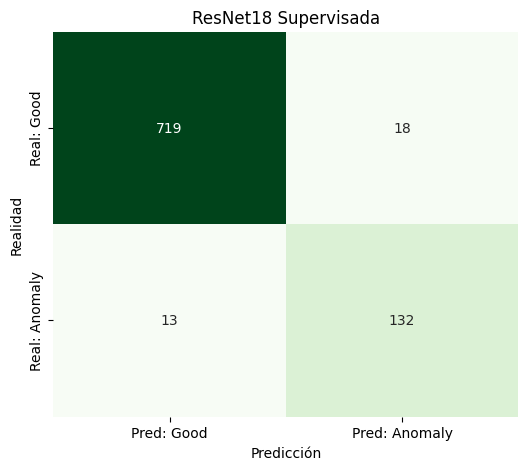

              precision    recall  f1-score   support

        Good       0.98      0.98      0.98       737
     Anomaly       0.88      0.91      0.89       145

    accuracy                           0.96       882
   macro avg       0.93      0.94      0.94       882
weighted avg       0.97      0.96      0.97       882

🔍 Defectos escapados: 13 de 145 (Recall: 91.03%)


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import models
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns
import numpy as np

# --- 1. CONFIGURACIÓN ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"🚀 Usando dispositivo: {device}")

# --- 2. DATASET PERSONALIZADO (Aquí hacemos la magia de 0-255 a 0-1) ---
class TextileDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        # 1. Obtener imagen (numpy array uint8 0-255) y etiqueta
        img = self.X[idx]
        label = self.y[idx]
        
        # 2. Asegurar canales (ResNet necesita 3 canales: R, G, B)
        # Si la imagen es (64, 64) -> Pasamos a (64, 64, 1) -> Repetimos a (64, 64, 3)
        if len(img.shape) == 2:
            img = np.expand_dims(img, axis=2)
            img = np.repeat(img, 3, axis=2)
        
        # 3. Transponer a formato PyTorch: (Alto, Ancho, Canales) -> (Canales, Alto, Ancho)
        img = img.transpose((2, 0, 1))
        
        # 4. A TENSOR Y NORMALIZAR (CRUCIAL: / 255.0)
        img_tensor = torch.tensor(img, dtype=torch.float32) / 255.0
        
        label_tensor = torch.tensor(label, dtype=torch.long)
        
        return img_tensor, label_tensor

# Crear Datasets y Loaders
train_dataset = TextileDataset(X_train, y_train)
val_dataset   = TextileDataset(X_val, y_val)   # Usamos Val para monitorear
test_dataset  = TextileDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader   = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader  = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# --- 3. CALCULAR PESOS PARA EL DESBALANCEO ---
# Como hay pocas anomalías, les damos más importancia en la Loss Function
num_good = np.sum(y_train == 0)
num_anomaly = np.sum(y_train == 1)
weight_anomaly = num_good / num_anomaly
print(f"⚖️ Pesos calculados -> Good: 1.0 | Anomaly: {weight_anomaly:.2f}")

# Pasamos los pesos al dispositivo (GPU/CPU)
class_weights = torch.tensor([1.0, weight_anomaly], dtype=torch.float32).to(device)

# --- 4. MODELO (ResNet18) ---
print("🏗️ Cargando ResNet18...")
model = models.resnet18(pretrained=True)

# Congelar capas (Transfer Learning)
# Esto hace que entrene mucho más rápido y necesite menos datos
for param in model.parameters():
    param.requires_grad = False

# Reemplazar la última capa (Fully Connected)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2) # 2 salidas: Good (0) vs Anomaly (1)

model = model.to(device)

# --- 5. ENTRENAMIENTO ---
criterion = nn.CrossEntropyLoss(weight=class_weights) # <--- Aquí aplicamos los pesos
optimizer = optim.Adam(model.fc.parameters(), lr=0.001)

num_epochs = 10 

train_losses = []
val_losses = []

print(f"🔥 Iniciando entrenamiento por {num_epochs} épocas...")

for epoch in range(num_epochs):
    # --- FASE DE TRAIN ---
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    avg_train_loss = running_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # --- FASE DE VALIDACIÓN ---
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
    avg_val_loss = val_loss / len(val_loader)
    val_losses.append(avg_val_loss)
    
    print(f"   Época {epoch+1}/{num_epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f}")

# --- 6. EVALUACIÓN FINAL EN TEST ---
print("\n📝 Evaluando en Test Set...")
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Visualizar Resultados
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['Pred: Good', 'Pred: Anomaly'],
            yticklabels=['Real: Good', 'Real: Anomaly'])
plt.title('ResNet18 Supervisada')
plt.ylabel('Realidad')
plt.xlabel('Predicción')
plt.show()

print(classification_report(all_labels, all_preds, target_names=['Good', 'Anomaly']))

fallos = cm[1,0]
total_anom = cm[1,0] + cm[1,1]
print(f"🔍 Defectos escapados: {fallos} de {total_anom} (Recall: {cm[1,1]/total_anom:.2%})")